<a href="https://colab.research.google.com/github/runo313/runo313/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

In [ ]:
df = sample


X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]



print('X1 = ', X1[: 5])
print('X2 = ', X2[: 5])
print('X3 = ', X3[: 5])
print('Y = ', Y[: 5])



X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


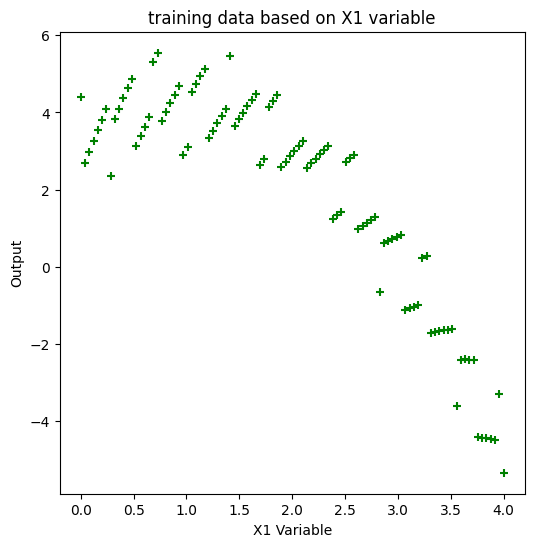

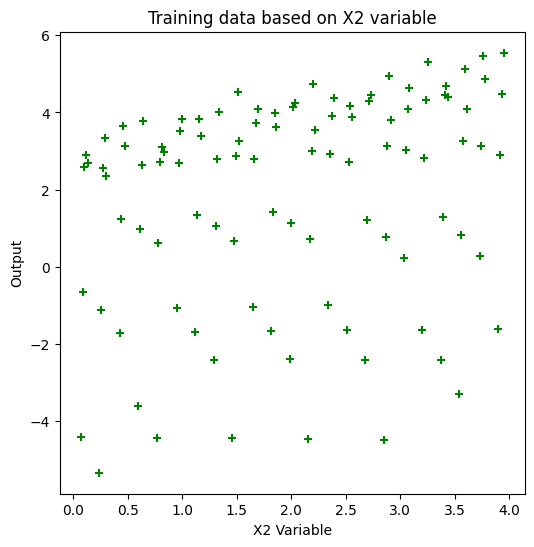

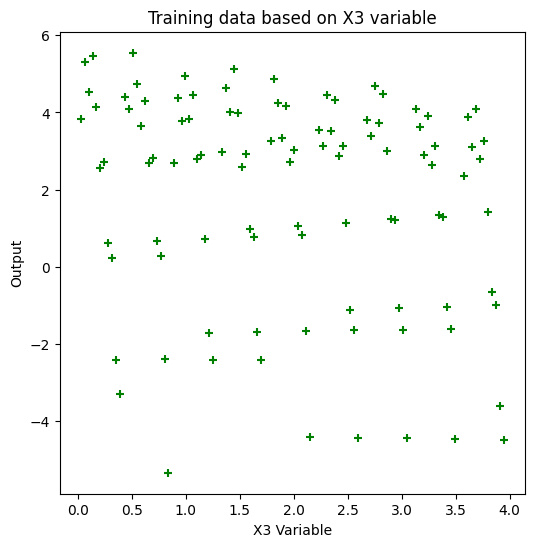

In [ ]:
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]


plt.scatter(X1, Y, color = 'green', marker='+')
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X1 Variable')
plt.ylabel('Output')
plt.title('training data based on X1 variable')
plt.show()
# Scatter plot for X2
plt.scatter(X2, Y, color='green', marker='+')
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X2 Variable')
plt.ylabel('Output')
plt.title('Training data based on X2 variable')
plt.show()

# Scatter plot for X3
plt.scatter(X3, Y, color='green', marker='+')
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('X3 Variable')
plt.ylabel('Output')
plt.title('Training data based on X3 variable')
plt.show()

In [ ]:


def compute_cost(X, Y, theta):

    m = len(Y)  # number of training examples
    Y_pred = theta[0] + theta[1] * X  # Predicted output
    error = Y_pred - Y  # Error in prediction
    cost = (1/(2*m)) * np.sum(error**2)  # Mean Squared Error
    return cost

# Example usage (using dummy theta values):
theta_example = np.array([0.5, -0.25])  # Dummy theta values

# Compute cost for X1 and Y
cost_X1 = compute_cost(X1, Y, theta_example)
print(f'Cost for X1: {cost_X1}')

# Compute cost for X2 and Y
cost_X2 = compute_cost(X2, Y, theta_example)
print(f'Cost for X2: {cost_X2}')

# Compute cost for X3 and Y
cost_X3 = compute_cost(X3, Y, theta_example)
print(f'Cost for X3: {cost_X3}')


Cost for X1: 4.87377515951853
Cost for X2: 5.756559981513631
Cost for X3: 5.373582414221428


In [ ]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


In [ ]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)  # For plotting purposes

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (learning_rate/m) * X.T.dot(errors)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history


In [ ]:
X1 = df.values[:, 0].reshape(-1,1)
X2 = df.values[:, 1].reshape(-1,1)
X3 = df.values[:, 2].reshape(-1,1)
Y = df.values[:, 3].reshape(-1,1)

# Add intercept term to each X
X1_b = np.c_[np.ones((len(X1), 1)), X1]
X2_b = np.c_[np.ones((len(X2), 1)), X2]
X3_b = np.c_[np.ones((len(X3), 1)), X3]


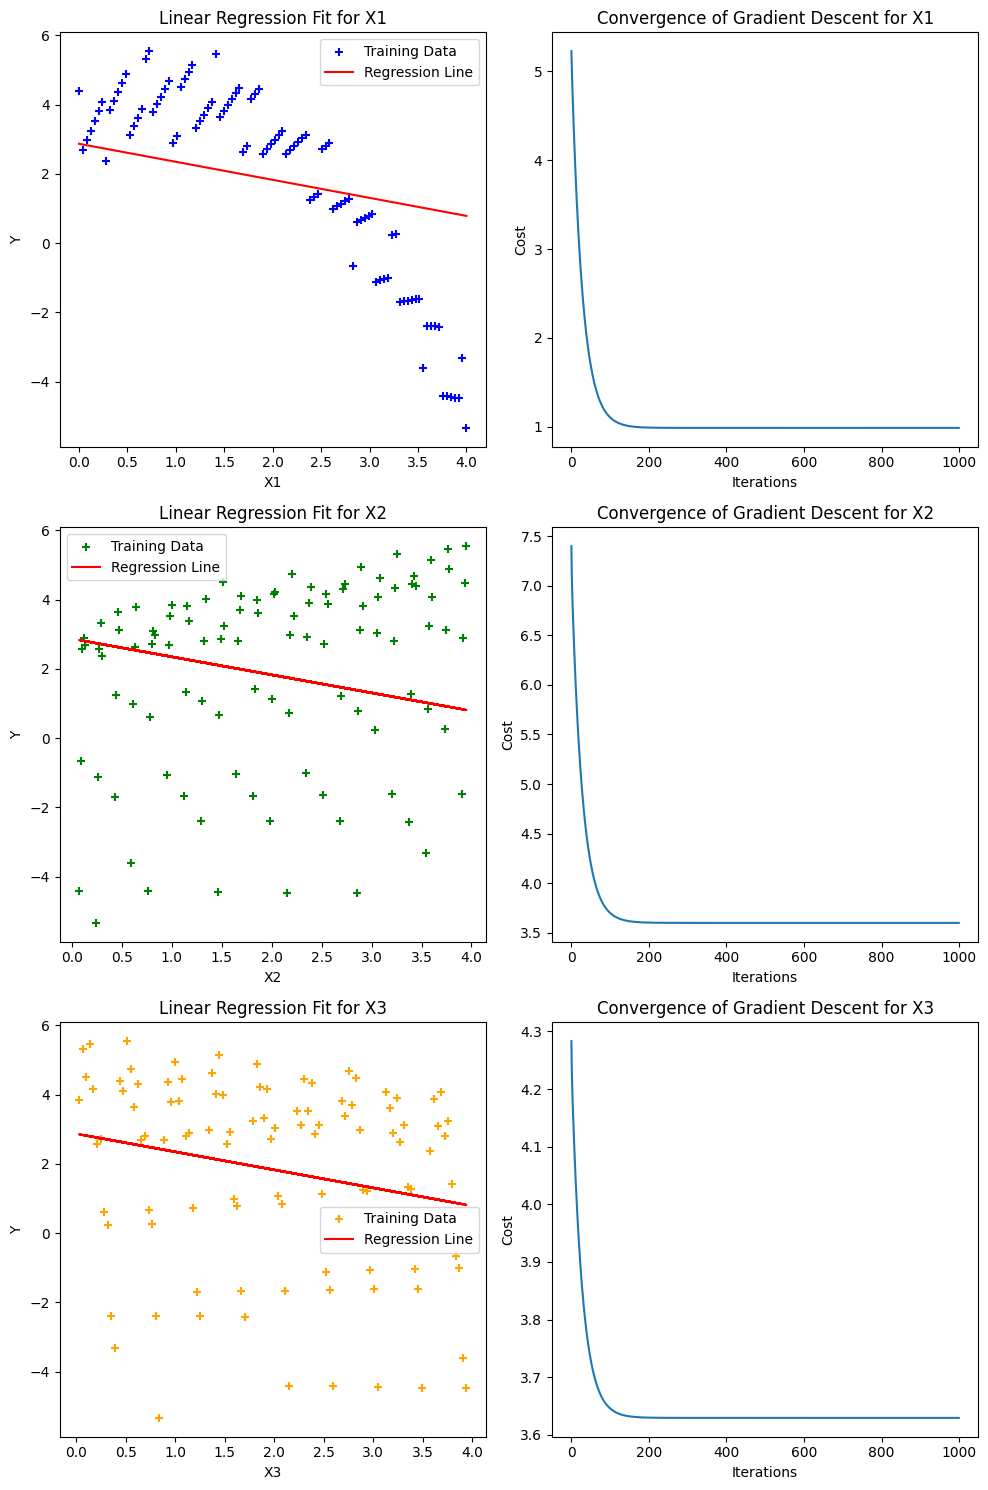

In [ ]:
# putting it all together to show the re

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta -= (1/m) * learning_rate * X.T.dot(predictions - y)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Prepare data for linear regression
def prepare_data(X):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X]  # Add intercept term
    return X_b

# Initialize parameters
theta_initial = np.zeros((2, 1))
learning_rate = 0.08
iterations = 1000

# Prepare data
X1_b = prepare_data(X1)
X2_b = prepare_data(X2)
X3_b = prepare_data(X3)

# Run gradient descent for each variable
theta_X1, cost_history_X1 = gradient_descent(X1_b, Y.reshape(-1,1), theta_initial, learning_rate, iterations)
theta_X2, cost_history_X2 = gradient_descent(X2_b, Y.reshape(-1,1), theta_initial, learning_rate, iterations)
theta_X3, cost_history_X3 = gradient_descent(X3_b, Y.reshape(-1,1), theta_initial, learning_rate, iterations)

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 15))

# X1
axs[0, 0].scatter(X1, Y, color='blue', marker='+', label='Training Data')
axs[0, 0].plot(X1, X1_b.dot(theta_X1), color='red', label='Regression Line')
axs[0, 0].set_xlabel('X1')
axs[0, 0].set_ylabel('Y')
axs[0, 0].set_title('Linear Regression Fit for X1')
axs[0, 0].legend()

axs[0, 1].plot(range(iterations), cost_history_X1)
axs[0, 1].set_xlabel('Iterations')
axs[0, 1].set_ylabel('Cost')
axs[0, 1].set_title('Convergence of Gradient Descent for X1')

# X2
axs[1, 0].scatter(X2, Y, color='green', marker='+', label='Training Data')
axs[1, 0].plot(X2, X2_b.dot(theta_X2), color='red', label='Regression Line')
axs[1, 0].set_xlabel('X2')
axs[1, 0].set_ylabel('Y')
axs[1, 0].set_title('Linear Regression Fit for X2')
axs[1, 0].legend()

axs[1, 1].plot(range(iterations), cost_history_X2)
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('Cost')
axs[1, 1].set_title('Convergence of Gradient Descent for X2')

# X3
axs[2, 0].scatter(X3, Y, color='orange', marker='+', label='Training Data')
axs[2, 0].plot(X3, X3_b.dot(theta_X3), color='red', label='Regression Line')
axs[2, 0].set_xlabel('X3')
axs[2, 0].set_ylabel('Y')
axs[2, 0].set_title('Linear Regression Fit for X3')
axs[2, 0].legend()

axs[2, 1].plot(range(iterations), cost_history_X3)
axs[2, 1].set_xlabel('Iterations')
axs[2, 1].set_ylabel('Cost')
axs[2, 1].set_title('Convergence of Gradient Descent for X3')

plt.tight_layout()
plt.show()


Problem 2

In [ ]:



def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost


def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta -= (1/m) * learning_rate * X.T.dot(predictions - y)
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Preparing data
X = np.c_[np.ones((len(X1), 1)), X1, X2, X3]
y = Y.reshape(-1,1)
theta_initial = np.zeros((4, 1))


learning_rate = 0.01
iterations = 450


theta_final, cost_history = gradient_descent(X, y, theta_initial, learning_rate, iterations)


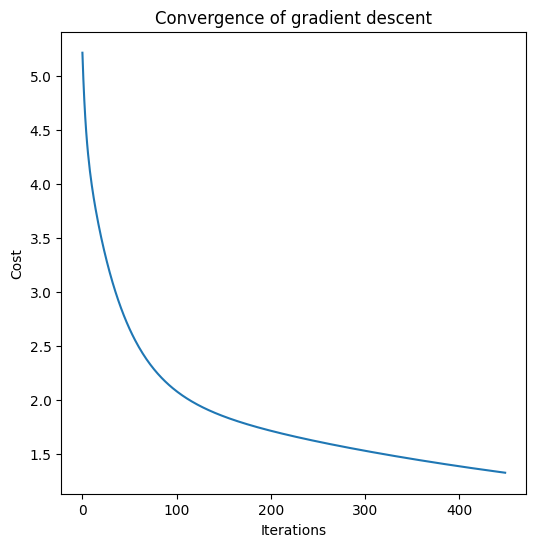

In [ ]:


plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of gradient descent')
plt.show()


In [ ]:
def predict(theta, X):
    return np.dot(X, theta)

# New (X1, X2, X3) values
new_X_values = np.array([
    [1, 1, 1, 1],  # Adding 1 for the intercept term, followed by (1, 1, 1)
    [1, 2, 0, 4],  # Adding 1 for the intercept term, followed by (2, 0, 4)
    [1, 3, 2, 1]   # Adding 1 for the intercept term, followed by (3, 2, 1)
])


predictions = predict(theta_final, new_X_values)


print("Predicted values of Y:")
for i, prediction in enumerate(predictions):
    print(f"For (X1, X2, X3) = {new_X_values[i][1:]}, predicted Y = {prediction[0]}")


Predicted values of Y:
For (X1, X2, X3) = [1 1 1], predicted Y = 1.764753416998398
For (X1, X2, X3) = [2 0 4], predicted Y = -0.19336211144889415
For (X1, X2, X3) = [3 2 1], predicted Y = -0.2177516127932586
